Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
importing Jupyter notebook from DataCleaning.ipynb
['REAL' 'FAKE']
Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


2023-11-02 12:32:07.494138: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [100000]
	 [[{{node Placeholder/_0}}]]
2023-11-02 12:32:07.494361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [100000]
	 [[{{node Placeholder/_4}}]]
2023-11-02 12:32:07.550504: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Found 100000 images belonging to 2 classes.
Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


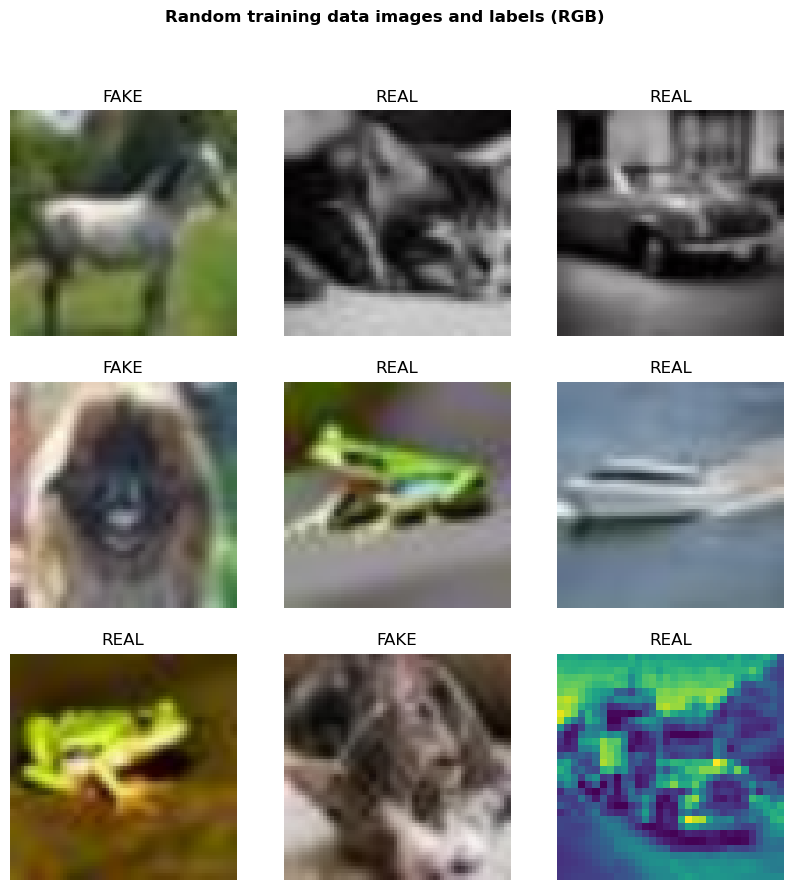

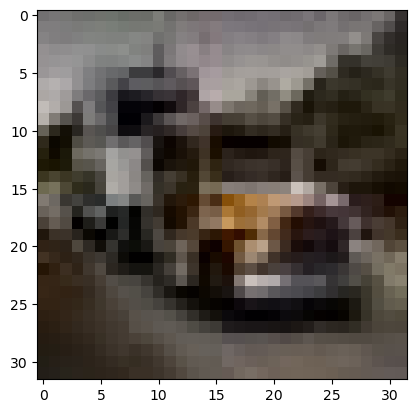

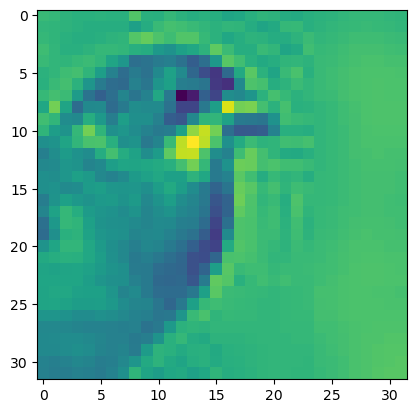

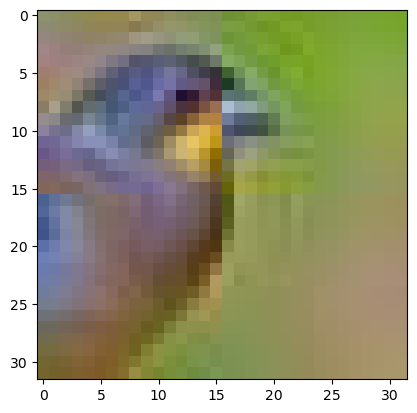

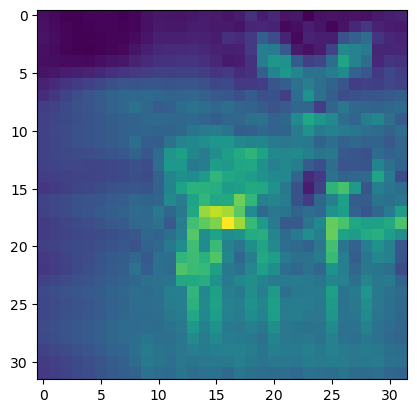

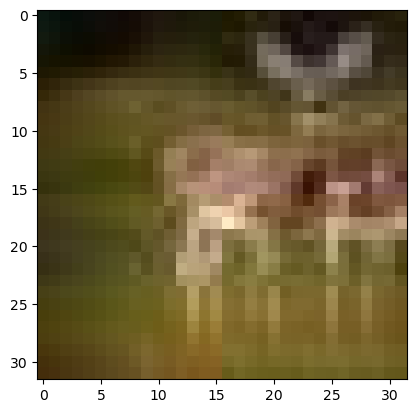

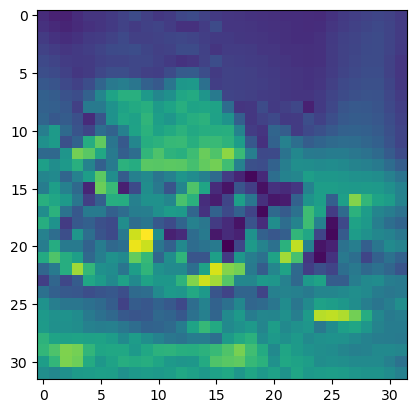

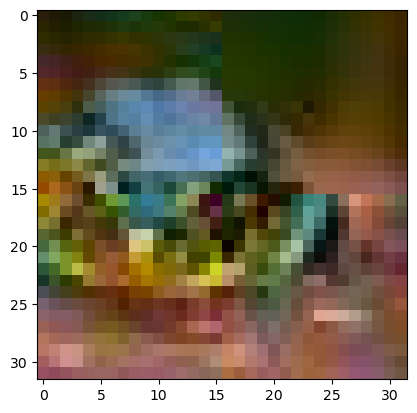

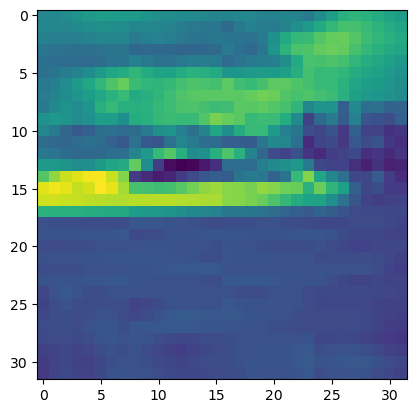

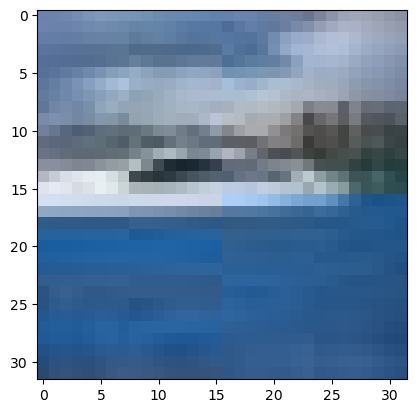

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

%pip install nbformat
%pip install import_ipynb

import import_ipynb
import DataCleaning




In [8]:
modelGRAY = models.Sequential()
# STANDARD LAYERING TECHNIQUE:
modelGRAY.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,1)))
#32 32 1 FOR DEPTH FOR GRAY - SHOULD BE THREE FOR RGB
modelGRAY.add(layers.MaxPooling2D((2, 2)))
modelGRAY.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelGRAY.add(layers.MaxPooling2D((2, 2)))
modelGRAY.add(layers.Conv2D(64, (3, 3), activation='relu'))

modelRGB = models.Sequential()
# STANDARD LAYERING TECHNIQUE:
modelRGB.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
#32 32 1 FOR DEPTH FOR GRAY - SHOULD BE THREE FOR RGB
modelRBG.add(layers.MaxPooling2D((2, 2)))
modelRBG.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelRBG.add(layers.MaxPooling2D((2, 2)))
modelRBG.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [9]:
modelGRAY.add(layers.Flatten())
modelGRAY.add(layers.Dense(64, activation='relu'))
modelGRAY.add(layers.Dense(10))

In [10]:
modelGRAY.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [11]:
modelGRAY.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#DEPTH FRO GRAYSCALE WILL BE ONE AND THREE FOR RGB
history = modelGRAY.fit(DataCleaning.TRAIN_GENERATOR_GRAY, epochs=10, validation_data=DataCleaning.TEST_GENERATOR_GRAY)

Epoch 1/10


2023-11-02 12:35:12.946722: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3120/3125 [============================>.] - ETA: 0s - loss: 0.5689 - accuracy: 0.7010

2023-11-02 12:35:41.984616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3125/3125 [==============================] - 35s 11ms/step - loss: 0.5686 - accuracy: 0.7012 - val_loss: 0.4372 - val_accuracy: 0.7944
Epoch 2/10
3125/3125 [==============================] - 33s 10ms/step - loss: 0.3763 - accuracy: 0.8355 - val_loss: 0.2874 - val_accuracy: 0.8813
Epoch 3/10
3125/3125 [==============================] - 35s 11ms/step - loss: 0.2958 - accuracy: 0.8760 - val_loss: 0.2438 - val_accuracy: 0.9027
Epoch 4/10
3125/3125 [==============================] - 35s 11ms/step - loss: 0.2635 - accuracy: 0.8904 - val_loss: 0.2462 - val_accuracy: 0.9020
Epoch 5/10
3125/3125 [==============================] - 41s 13ms/step - loss: 0.2341 - accuracy: 0.9050 - val_loss: 0.2395 - val_accuracy: 0.9031
Epoch 6/10
3125/3125 [==============================] - 37s 12ms/step - loss: 0.2203 - accuracy: 0.9102 - val_loss: 0.2094 - val_accuracy: 0.9149
Epoch 7/10
3125/3125 [==============================] - 41s 13ms/step - loss: 0.2045 - accuracy: 0.9175 - val_loss: 0.2061 - val_accura

2023-11-02 12:42:31.958243: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


625/625 - 4s - loss: 0.2433 - accuracy: 0.9050 - 4s/epoch - 7ms/step


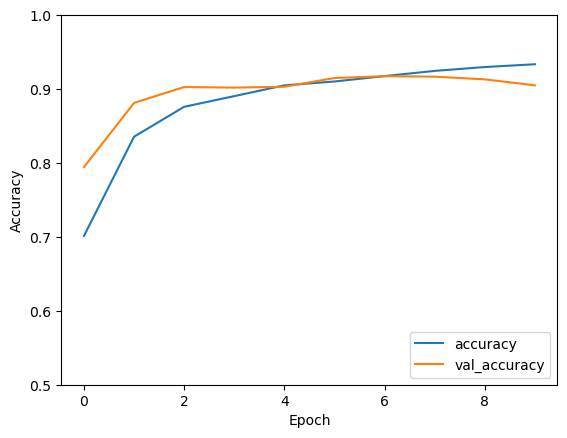

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = modelGRAY.evaluate(DataCleaning.TEST_GENERATOR_GRAY, verbose=2)

In [13]:
print(test_acc)

0.9049999713897705
